# Notebook overview
Loads an MLP training log (learn_process.csv) and visualizes validation & training balanced accuracy, loss, and learning rate across epochs. Exports the resulting plot to the results folder.

### Imports

In [192]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

### Path - result_dir_path

In [193]:
### Folder to save/load results
RESULT_DIR_PATH = r'/home/jleick/masterArbeitProjekt/final_release/models/mlp/origin/model'
# RESULT_DIR_PATH = r'/home/jleick/masterArbeitProjekt/final_release/models/mlp/resized/model'
result_dir_path = Path(RESULT_DIR_PATH)
if not result_dir_path.exists():
    raise FileNotFoundError(f"Folder does not exist: {RESULT_DIR_PATH}")

### Load - learn_process_df

In [194]:
# load df - learn_process
learn_process_path = result_dir_path / "learn_process.csv"
if not learn_process_path.exists():
    raise FileNotFoundError(f"File does not exist: {learn_process_path}")

learn_process_df = pd.read_csv(learn_process_path, index_col=False)

### Function - plot_train_process

In [ ]:
# Save training process diagrams as PNG, PDF, and SVG

def plot_train_process(1_accuracies_val_list, 1_accuracies_train_list, 1_loss_values, 1_lr_list, 1_n_epoch):
    
    # Plot accuracies_val
    fig = plt.figure(figsize=(8, 10))
    ax1 = fig.add_subplot(3,1,1)
    ax2 = fig.add_subplot(3,1,2)
    ax3 = fig.add_subplot(3,1,3)

    # Plot für Validation und Training Accuracy
    ax1.plot(range(1, n_epoch + 1), accuracies_val_list, label='Validation Balanced Accuracy')
    ax1.plot(range(1, n_epoch + 1), accuracies_train_list, label='Train Balanced Accuracy')
    ax1.set_xticks(range(1, n_epoch + 1))
    ax1.set_yticks(np.arange(0, 1.1, 0.1))
    ax1.set_xlabel('Epoch')  # X-Achsenbeschriftung für den ersten Subplot
    ax1.set_ylabel('Balanced Accuracy (%)')  # Y-Achsenbeschriftung für den ersten Subplot
    ax1.set_title('Validation and Training Balanced Accuracy over Epochs')  # Titel für den ersten Subplot
    ax1.legend()
    ax1.grid(True)
    ax1.set_ylim(0, 1)

    # Plot für Loss
    ax2.plot(range(1, n_epoch + 1), loss_values, label='Loss')
    ax2.set_xticks(range(1, n_epoch + 1))
    ax2.set_yticks(np.arange(0, 2.2 + 0.1, 0.2))
    ax2.set_xlabel('Epoch')  # X-Achsenbeschriftung für den zweiten Subplot
    ax2.set_ylabel('Loss Values')  # Y-Achsenbeschriftung für den zweiten Subplot
    ax2.set_title('Loss over Epochs')  # Titel für den zweiten Subplot
    ax2.legend()
    ax2.grid(True)
    ax2.set_ylim(0, 2.2 + 0.1)

    # Plot für Lerning Rate
    ax3.step(range(1, n_epoch + 1), lr_list, label='Learning Rate')
    ax3.set_xticks(range(1, n_epoch + 1))
    ax3.set_yticks(np.arange(0, learn_process_df["Learning_Rate"].max() + 0.00015, 0.0001))
    ax3.set_xlabel('Epoch')  # X-Achsenbeschriftung für den zweiten Subplot
    ax3.set_ylabel('Learning Rate')  # Y-Achsenbeschriftung für den zweiten Subplot
    ax3.set_title('Learning Rate over Epochs')  # Titel für den zweiten Subplot
    ax3.legend()
    ax3.grid(True)
    ax3.set_ylim(0, learn_process_df["Learning_Rate"].max() + 0.00015)

    plt.tight_layout()  # adjust layout to prevent overlap
    return plt


# plt = create_plot_train_process(process["Validation_Balanced_Accuracy"], process["Train_Balanced_Accuracy"], process["Loss (Last Batch)"], process["Learning_Rate"], process["Epoch"].max())
# save_plot(plt,SAVE_RESULTS_FOLDER, "mlp_learning_process_plot")
# plt.show()


### Apply and Save - Plot

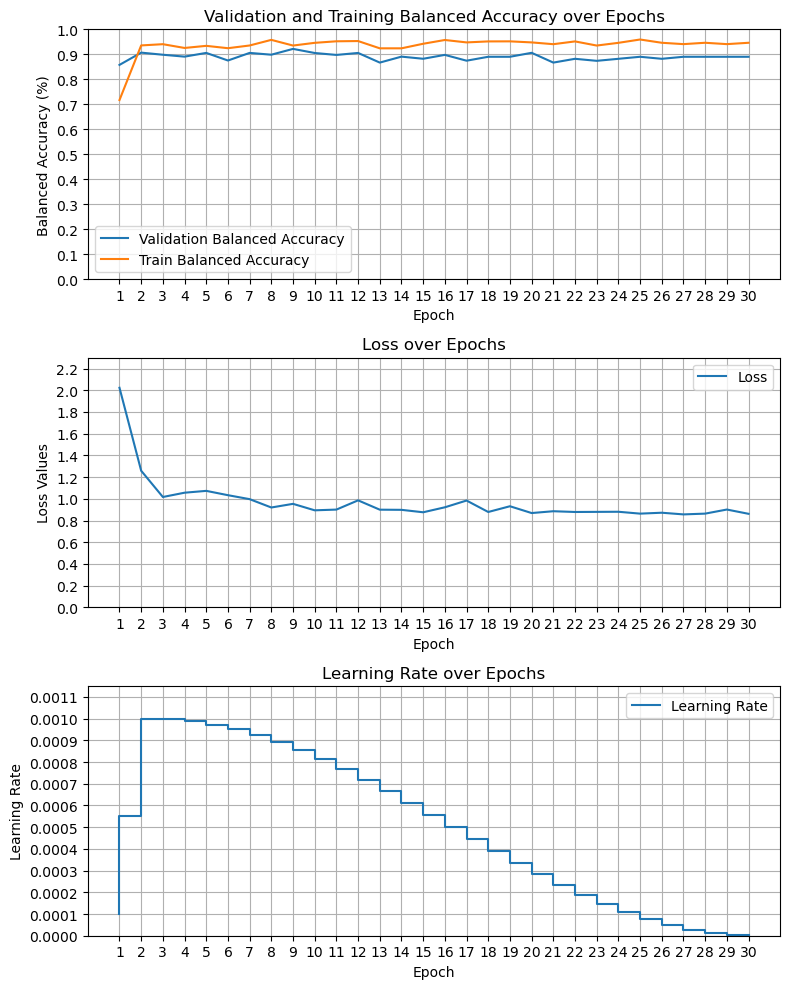

In [197]:
plt = plot_train_process(
    learn_process_df["Validation_Balanced_Accuracy"],
    learn_process_df["Train_Balanced_Accuracy"],
    learn_process_df["Loss (Last Batch)"],
    learn_process_df["Learning_Rate"],
    learn_process_df["Epoch"].max())

plt.savefig( result_dir_path / "learn_process_plot.pdf")
plt.show()